### <center>Customer Segmentation Using K Means Clustering</center>

![title](1.jpg)

#### <center>1. Import the lib's</center>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#### <center>2. Import the dataset</center>

#### 1. Import the dataset

In [41]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

#### 2. Print the dataset

In [42]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### <center>3. Exploratory data analysis </center>

#### 1. Printing the head


In [43]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 2. Print the shape

In [44]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

#### 3. Getting some information from the data

In [45]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### 4. Checking the missing values

In [46]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 5. Plot the age frequency of customers

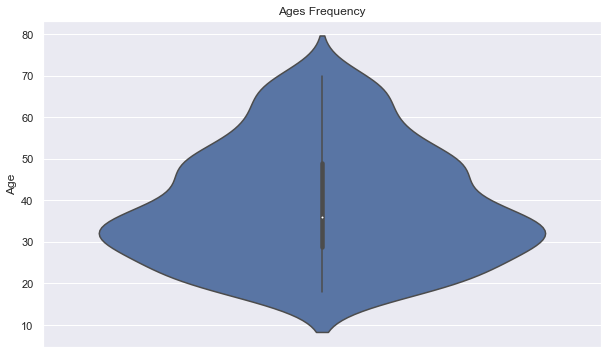

In [47]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=customer_data["Age"])
plt.show()

#### 6. Box plot of spending score and annual income to better visualize the distribution range

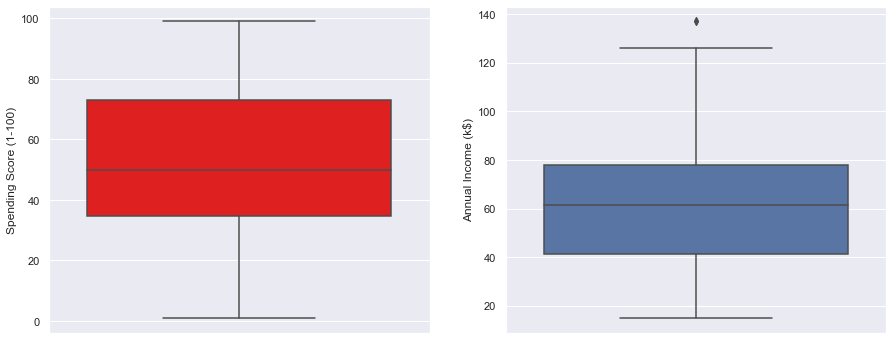

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=customer_data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=customer_data["Annual Income (k$)"])
plt.show()


#### 7. Bar plot to check the distribution of male and female population in the dataset

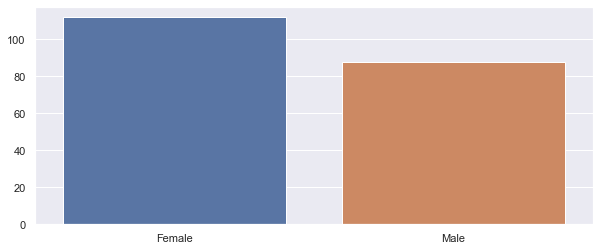

In [49]:
genders = customer_data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()


#### 8. Bar plot to check the distribution of number of customers in each age group

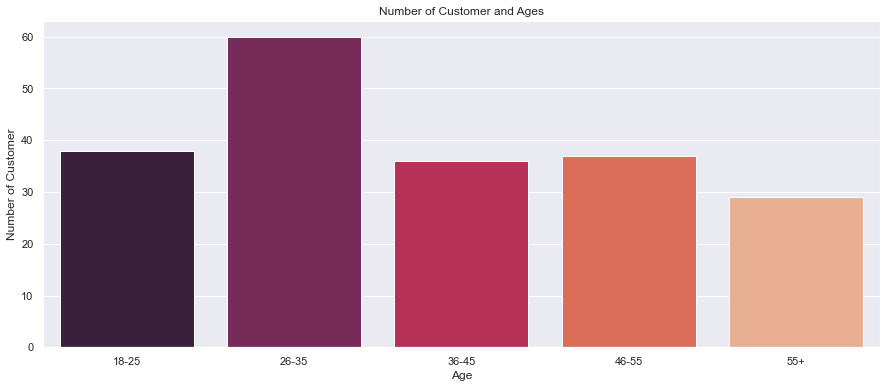

In [50]:
age18_25 = customer_data.Age[(customer_data.Age <= 25) & (customer_data.Age >= 18)]
age26_35 = customer_data.Age[(customer_data.Age <= 35) & (customer_data.Age >= 26)]
age36_45 = customer_data.Age[(customer_data.Age <= 45) & (customer_data.Age >= 36)]
age46_55 = customer_data.Age[(customer_data.Age <= 55) & (customer_data.Age >= 46)]
age55above = customer_data.Age[customer_data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

#### 9. Bar plot to visualize the number of customers according to their spending scores

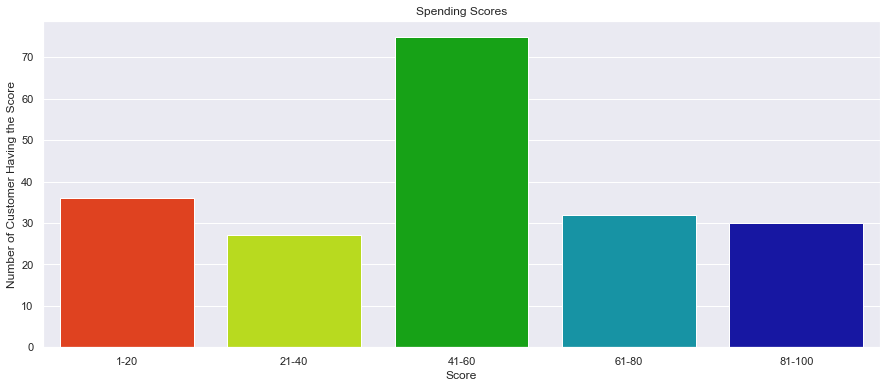

In [51]:
ss1_20 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 20)]
ss21_40 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 40)]
ss41_60 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 60)]
ss61_80 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 80)]
ss81_100 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()


#### 10. Bar plot to visualize the number of customers according to their annual income

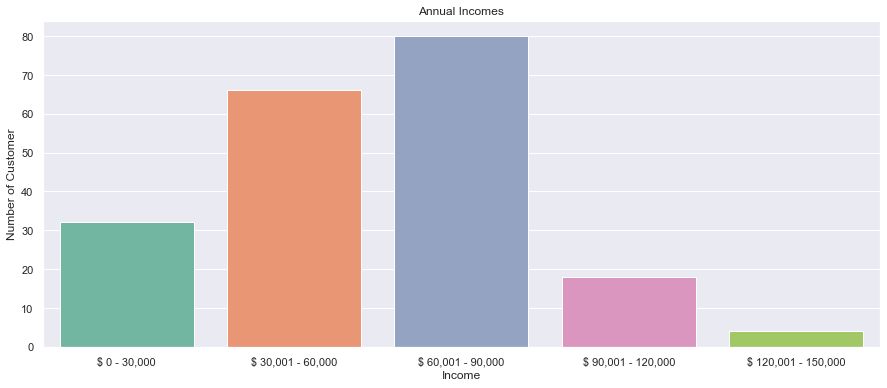

In [52]:
ai0_30 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 0) & (customer_data["Annual Income (k$)"] <= 30)]
ai31_60 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 31) & (customer_data["Annual Income (k$)"] <= 60)]
ai61_90 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 61) & (customer_data["Annual Income (k$)"] <= 90)]
ai91_120 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 91) & (customer_data["Annual Income (k$)"] <= 120)]
ai121_150 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 121) & (customer_data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


#### <center>4. Building the model </center>

#### 1. Choosing the Annual Income Column & Spending Score column

In [53]:
X = customer_data.iloc[:,[3,4]].values

In [54]:
X.shape

(200, 2)

In [55]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

#### 2. Choosing the number of clusters

![title](2.png)

In [56]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

#### 2. Plot an elbow graph

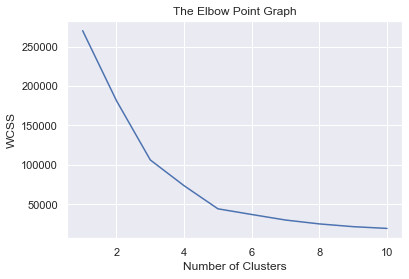

In [57]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### 3. Return a label for each data point based on their cluster

In [58]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


#### 4. Plotting all the clusters and their Centroids

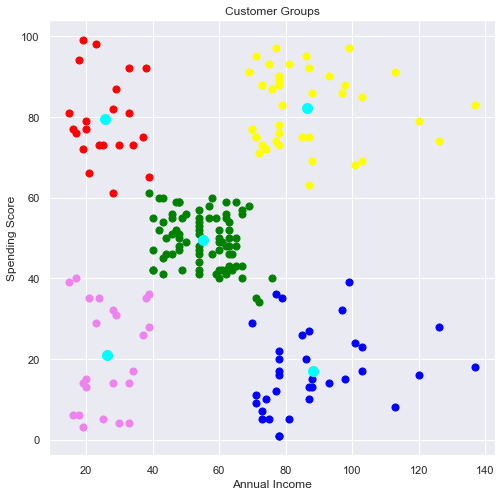

In [59]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()